<a href="https://colab.research.google.com/github/hansa31/GBM-analysis/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [ ]:

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GBM/PreProcess_data_2_train.csv')
df.head()

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival_cat
0,1662,384,36268,2046,38314,1469432,4.328125,0.045826,0.010588,0.81232,...,2203.2034,61.3293,8.00000,7.500000e-07,0.178609,0.096256,0.052741,2.0000,56.208219,HIGH
1,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,0.276601,0.50075,...,1440.4285,3.5999,3.31250,1.000000e-09,0.077619,0.122900,0.094336,91.4736,61.526027,MID
2,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,1.061444,0.40729,...,1147.5177,0.8048,5.78125,1.000000e-09,0.132283,0.116006,0.096035,272.4290,18.975342,HIGH
3,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,0.222584,0.61489,...,3320.1690,4.7336,3.87500,1.000000e-09,0.100415,0.088249,0.096470,128.4680,33.887671,MID
4,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,0.108708,0.82875,...,1834.1052,2.4532,1.00000,5.730000e-08,0.106184,0.131952,0.096894,240.7780,54.986301,LOW


In [4]:
from sklearn.preprocessing import StandardScaler

# take x data and y data from the df_noAge, and convert them to numpy arrays, y is the last column which is catogorical
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(76, 705)

Results from the previous RFE

Selected 5 features: Index(['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 6 features: Index(['HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 7 features: Index(['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 8 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 9 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 10 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 11 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 12 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LZHGE',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T2_ZP',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 13 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_SZLGE',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 14 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_ZP', 'TEXTURE_GLSZM_NET_T2_LGZE',
       'TEXTURE_GLSZM_NET_T2_ZSV', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 15 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin6',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 16 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 17 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_NET_T1_Bin10',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 18 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_ET_T1_Bin1',
       'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_LGZE',
       'TEXTURE_GLSZM_NET_FLAIR_GLV', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 19 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1',
       'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_ET_T1_Bin5', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TEXTURE_NGTDM_ET_T1Gd_Strength',
       'TGM_T_1', 'Age'],
      dtype='object')


Selected 20 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1',
       'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_ET_T1_Bin10', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LGZE',
       'TEXTURE_GLSZM_NET_T1_HGZE', 'TEXTURE_GLSZM_NET_T1_SZLGE',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 21 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin9', 'HISTO_NET_T1Gd_Bin10',
       'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3',
       'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin5', 'HISTO_NET_T2_Bin9',
       'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T1_ZSV',
       'TEXTURE_GLSZM_NET_T2_SZE', 'TEXTURE_GLSZM_NET_T2_LZE',
       'TEXTURE_GLSZM_NET_T2_GLN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 22 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_NET_T2_Bin9',
       'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE',
       'TEXTURE_NGTDM_ET_T2_Coarseness', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 23 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin6',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LZE',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 24 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin5',
       'HISTO_ET_T1_Bin6', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LZHGE',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T1_ZSV',
       'TEXTURE_GLSZM_NET_T2_SZE', 'TEXTURE_GLSZM_NET_T2_LZE',
       'TEXTURE_GLSZM_NET_T2_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 25 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin5',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_LGZE', 'TEXTURE_GLSZM_NET_T1_HGZE',
       'TEXTURE_GLSZM_NET_T1_SZLGE', 'TEXTURE_GLSZM_NET_T1_SZHGE',
       'TEXTURE_GLSZM_NET_T1_LZLGE', 'TEXTURE_GLSZM_NET_T1_LZHGE',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T1_ZSV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')

# CART

In [ ]:
# helper function

def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf, feature_names):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion,
                                        splitter=splitter,
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf,
                                        random_state=0,
                                  )

    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    # Use graphviz to plot the tree
    dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                #class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1], str(list(clf.classes_)[2]))],
                                class_names = ['HIGH', 'LOW', 'MID'],
                                filled=True,
                                rounded=True,
                                #rotate=True,
                               )
    graph = graphviz.Source(dot_data)

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, graph

In [ ]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age']
selected_values = X[:, [df.columns.get_loc(col) for col in valid_columns]]

In [ ]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf, graph = fitting(selected_values, y, 'gini', 'best',
                                                       mdepth=10,
                                                       clweight=None,
                                                       minleaf=1,
                                                       feature_names = valid_columns)

*************** Tree Summary ***************
Classes:  ['HIGH' 'LOW' 'MID']
Tree Depth:  7
No. of leaves:  20
No. of features:  5
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.75
              precision    recall  f1-score   support

        HIGH       0.67      1.00      0.80         2
         LOW       0.80      1.00      0.89         4
         MID       0.00      0.00      0.00         2

    accuracy                           0.75         8
   macro avg       0.49      0.67      0.56         8
weighted avg       0.57      0.75      0.64         8

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00        23
         LOW       1.00      1.00      1.00        27
         MID       1.00      1.00      1.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


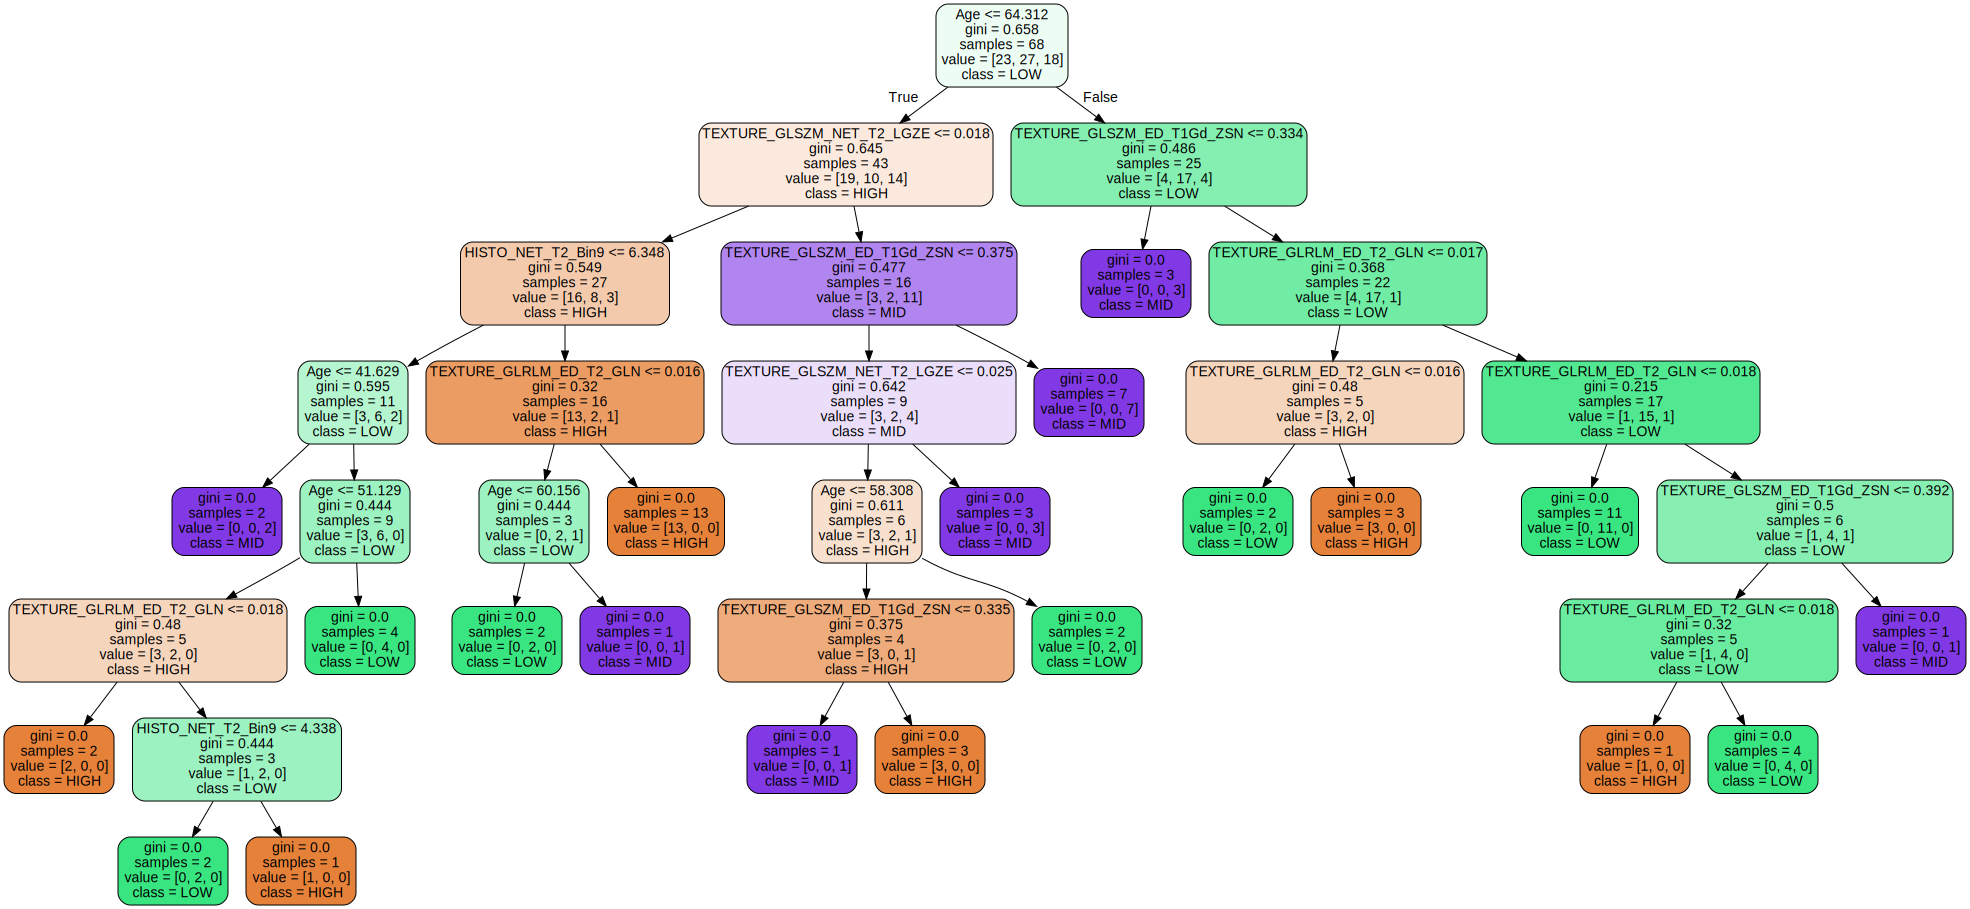

In [ ]:
graph

# RF with N-Fold CV

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [13]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age']
selected_values = X[:, [df.columns.get_loc(col) for col in valid_columns]]

In [15]:
selected_values.shape

(76, 5)

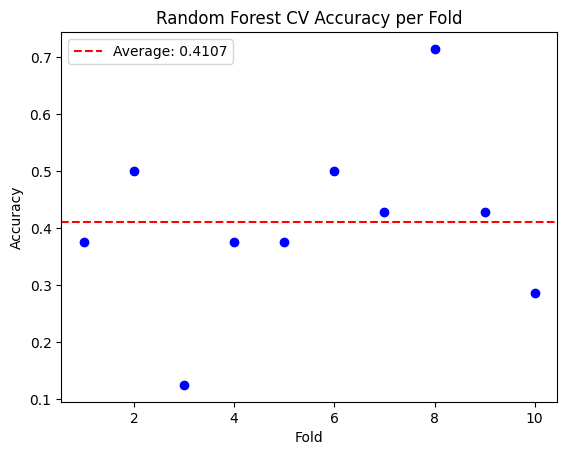

Average cross-validation accuracy: 0.4107


In [14]:
# Define number of folds for cross-validation
n_folds = 10

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_pred = np.zeros_like(y)

# Plot setup
fig, ax = plt.subplots()

# Iterate over folds
for fold_id, (train_index, test_index) in enumerate(skf.split(selected_values, y)):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred[test_index] = model.predict(X_test)

    # Evaluate the model using accuracy (replace with your desired metric)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, y_pred[test_index])
    scores.append(score)

    # Plot individual fold accuracy
    ax.plot([fold_id + 1], [score], marker='o', linestyle='-', color='b')

# Plot average accuracy line
avg_score = np.mean(scores)
ax.axhline(y=avg_score, color='r', linestyle='--', label=f'Average: {avg_score:.4f}')

# Customize plot
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest CV Accuracy per Fold')
ax.legend()
plt.show()

# Print the average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(scores):.4f}")

## with 10 features

In [18]:

valid_columns =['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age']
selected_values_10 = X[:, [df.columns.get_loc(col) for col in valid_columns]]

In [19]:
selected_values_10.shape

(76, 10)

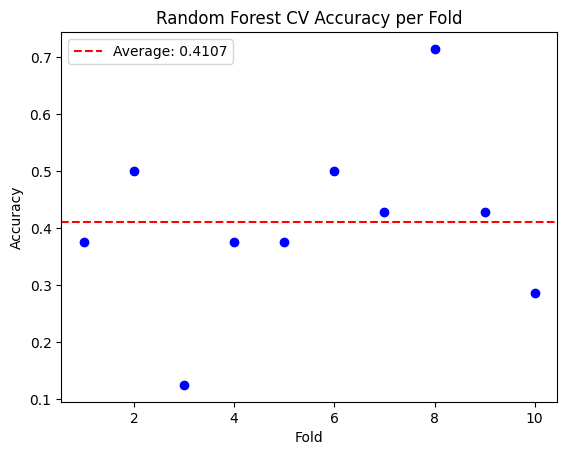

Average cross-validation accuracy: 0.4107


In [20]:
# Define number of folds for cross-validation
n_folds = 10

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_pred = np.zeros_like(y)

# Plot setup
fig, ax = plt.subplots()

# Iterate over folds
for fold_id, (train_index, test_index) in enumerate(skf.split(selected_values_10, y)):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred[test_index] = model.predict(X_test)

    # Evaluate the model using accuracy (replace with your desired metric)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, y_pred[test_index])
    scores.append(score)

    # Plot individual fold accuracy
    ax.plot([fold_id + 1], [score], marker='o', linestyle='-', color='b')

# Plot average accuracy line
avg_score = np.mean(scores)
ax.axhline(y=avg_score, color='r', linestyle='--', label=f'Average: {avg_score:.4f}')

# Customize plot
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest CV Accuracy per Fold')
ax.legend()
plt.show()

# Print the average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(scores):.4f}")

# SHAP + Random Forest

In [ ]:
df.columns.get_loc('VOLUME_ET')

0

In [ ]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age']
selected_values = X[:, [df.columns.get_loc(col) for col in valid_columns]]

#print(selected_values)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state =1502)
model.fit(selected_values, y)

RandomForestClassifier(n_estimators=20, random_state=1502)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.TreeExplainer(model)

['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age']

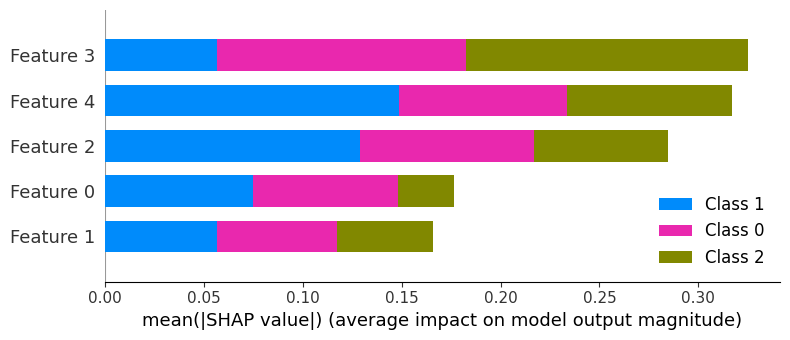

In [ ]:
#sample = selected_values.sample(25)
# Get desired sample size
n_samples = 25  # Replace with your desired number of samples
# Calculate row indices for sampling
row_indices = np.random.choice(selected_values.shape[0], size=n_samples, replace=False)  # Avoid duplicates
# Select corresponding rows from the matrix
sample= selected_values[row_indices, :]
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values,sample)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Make predictions on the training data
y_pred = model.predict(selected_values)

# Calculate and print the accuracy
accuracy = accuracy_score(y, y_pred)
print("Training accuracy:", accuracy)

Training accuracy: 1.0


with 20 features

In [ ]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin10', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LGZE', 'TEXTURE_GLSZM_NET_T1_HGZE', 'TEXTURE_GLSZM_NET_T1_SZLGE', 'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age']
selected_values = X[:, [df.columns.get_loc(col) for col in valid_columns]]

#print(selected_values)

In [ ]:

model = RandomForestClassifier(n_estimators=20, random_state =1502)
model.fit(selected_values, y)

RandomForestClassifier(n_estimators=20, random_state=1502)

In [ ]:
explainer = shap.TreeExplainer(model)

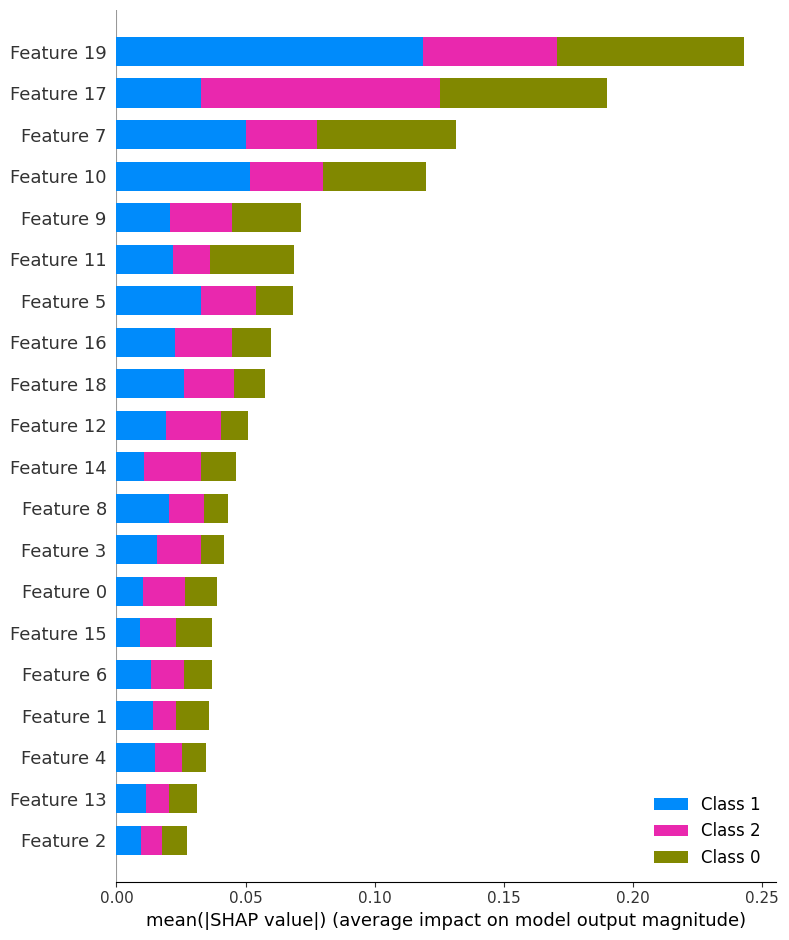

In [ ]:
#sample = selected_values.sample(25)
# Get desired sample size
n_samples = 25  # Replace with your desired number of samples
# Calculate row indices for sampling
row_indices = np.random.choice(selected_values.shape[0], size=n_samples, replace=False)  # Avoid duplicates
# Select corresponding rows from the matrix
sample= selected_values[row_indices, :]
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values,sample)

In [ ]:
valid_columns[19]

'Age'

In [ ]:
valid_columns[17]

'TEXTURE_GLSZM_NET_T2_LGZE'

In [ ]:
valid_columns[7]

'HISTO_NET_T2_Bin9'